In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from ast import literal_eval

In [2]:
controller_output = Path('output')

In [3]:
low_df = pd.read_csv(controller_output / '100_runs_lowest.csv')
high_df = pd.read_csv(controller_output / '100_runs_highest.csv')
random_df = pd.read_csv(controller_output / '100_runs_random.csv')

In [4]:
for df in [low_df, high_df, random_df]:
    df.loc[~df['predicted_optimal_utility'].isna(), 'rule_costs'] = df.loc[~df['predicted_optimal_utility'].isna(), 'rule_costs'].apply(literal_eval)

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(x='run', y='system_utility', data=low_df, ax=ax, ci=None, label='Lowest Cost Rule')
sns.lineplot(x='run', y='system_utility', data=high_df, ax=ax, ci=None, label='Highest Cost Rule')
sns.lineplot(x='run', y='system_utility', data=random_df, ax=ax, ci=None, label='Random Rule')
ax.set(xlabel='Run', ylabel='System Utility');

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
lowest = sns.lineplot(x='run', y='shop_utility', hue='shop', data=low_df, ci=None, linestyle='dashed', ax=ax, label='Lowest Cost Rule', legend=False)
highest = sns.lineplot(x='run', y='shop_utility', hue='shop', data=high_df, ci=None, linestyle='dotted', ax=ax, label='Highest Cost Rule', legend=False)
random = sns.lineplot(x='run', y='shop_utility', hue='shop', data=random_df, ci=None, ax=ax, label='Random Rule', legend=False)
ax.set(xlabel='Run', ylabel='Shop Utility');
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::10], ['Lowest Cost Rule', 'Highest Cost Rule', 'Random Rule']);

In [269]:
example_shop = low_df.loc[low_df['shop'] == 'mRUBiS #1']#.set_index(['run', 'fix_status', 'shop'])

In [277]:
example_shop.loc[~example_shop['rule_costs'].isna(), 'min_cost'] = example_shop.loc[~example_shop['rule_costs'].isna(), 'rule_costs'].apply(min)

/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [285]:
example_shop['combined_index'] = example_shop['run'].astype(str) + '_' + example_shop['fix_status'].astype(str) + '_' + example_shop['failure_name'].astype(str)

<ipython-input-285-1260da2422ae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  example_shop['combined_index'] = example_shop['run'].astype(str) + '_' + example_shop['fix_status'].astype(str) + '_' + example_shop['failure_name'].astype(str)


<AxesSubplot:xlabel='combined_index'>

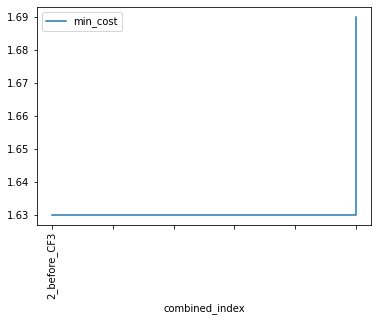

In [300]:
example_shop.query('run < 5').dropna(subset=['min_cost']).plot(x='combined_index', y='min_cost', drawstyle='steps-post', rot=90)

In [290]:
example_shop_utility = example_shop.set_index(['run', 'fix_status', 'shop']).groupby(level=[0,1,2])[['shop_utility', 'failure_name']].first().reset_index()

In [291]:
example_shop_utility['combined_index'] = example_shop_utility['run'].astype(str) + "_" + example_shop_utility['fix_status'].astype(str) + '_' + example_shop_utility['failure_name'].astype(str)

In [292]:
example_shop_utility

,run,fix_status,shop,shop_utility,failure_name,combined_index
0,1,after,mRUBiS #1,148322.154518,None,1_after_None
1,1,before,mRUBiS #1,148322.154518,None,1_before_None
2,2,after,mRUBiS #1,148322.154518,None,2_after_None
3,2,before,mRUBiS #1,144420.088231,CF3,2_before_CF3
4,3,after,mRUBiS #1,148322.154518,None,3_after_None
...,...,...,...,...,...,...
195,98,before,mRUBiS #1,148322.154518,None,98_before_None
196,99,after,mRUBiS #1,200244.271084,None,99_after_None
197,99,before,mRUBiS #1,148322.154518,CF3,99_before_CF3
198,100,after,mRUBiS #1,200244.271084,None,100_after_None


<AxesSubplot:xlabel='combined_index'>

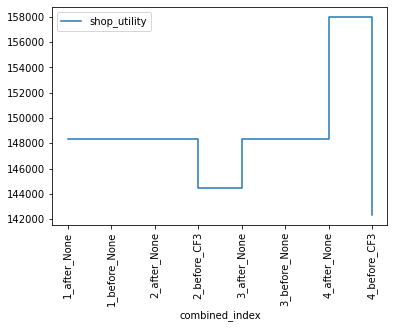

In [299]:
example_shop_utility.query('run < 5').plot(x='combined_index', y='shop_utility', drawstyle='steps-post', rot=90)

In [199]:
diffs = example_shop_utility.sort_index(ascending=False, level=[0,1], sort_remaining=False)\
                                .sort_index(level=[0], sort_remaining=False)\
                                .diff(1)

<AxesSubplot:xlabel='run'>

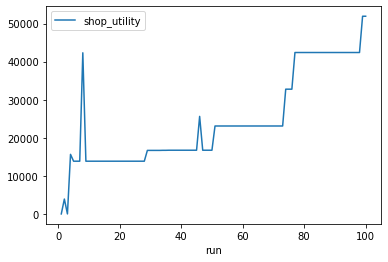

In [200]:
diffs.iloc[1::2]\
     .reset_index()\
     .plot(x='run', y='shop_utility')

In [191]:
example_before = example_shop.loc[~example_shop['rule_costs'].isna()]
example_before.loc[:, 'min_cost'] = example_before['rule_costs'].apply(min);

In [192]:
example_before['min_cost_standardized']  = example_before['min_cost'] / example_before['min_cost'].max()
example_before['predicted_optimal_utility_standardized'] = example_before['predicted_optimal_utility'] / example_before['predicted_optimal_utility'].max()
example_before['shop_utility_standardized'] = example_before['shop_utility'] / example_before['shop_utility'].max()

<ipython-input-192-0b8d4685d0b9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  example_before['min_cost_standardized']  = example_before['min_cost'] / example_before['min_cost'].max()
<ipython-input-192-0b8d4685d0b9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  example_before['predicted_optimal_utility_standardized'] = example_before['predicted_optimal_utility'] / example_before['predicted_optimal_utility'].max()
<ipython-input-192-0b8d4685d0b9>:3: SettingWithCopyWarning: 
A value is trying to be set

<AxesSubplot:xlabel='failure_name'>

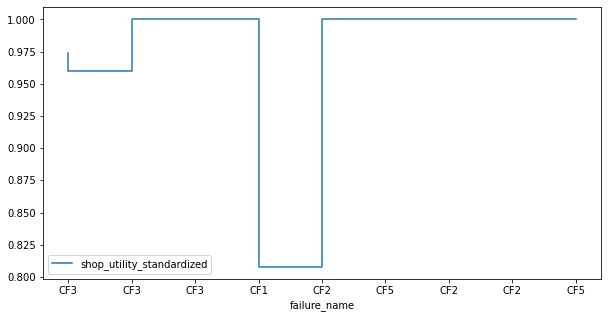

In [196]:
example_before.reset_index()\
              .query('run < 15')\
              .plot(
                  x='failure_name',
                  y='shop_utility_standardized',
                  drawstyle="steps",
                  figsize=(10,5))